In [37]:
from bs4 import BeautifulSoup
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
arquivo = open("votos_html.txt")
dados_html = arquivo.read()
arquivo.close()

In [39]:
soup = BeautifulSoup(dados_html, 'html.parser')

In [40]:
votos = []
for deputado in soup.find_all("div", attrs={"class" : "custom-representative"}):
    dados_deputado =[]
    dados_deputado.append(deputado['data-choice']) #voto
    resultado_busca_nome = re.search(r'.*Federal (.*)\((.*?)–(.*?)\)',deputado.img['alt'])
    dados_deputado.append(resultado_busca_nome.group(1)) #nome
    dados_deputado.append(resultado_busca_nome.group(2)) #partido
    dados_deputado.append(resultado_busca_nome.group(3)) #estado
    dados_deputado.append(deputado.img['src']) #link
    votos.append(dados_deputado)

In [41]:
votos_df = pd.DataFrame(votos, columns=['voto', 'dp.Federal', 'partido', 'estado','foto Deputado'])
votos_df

,voto,dp.Federal,partido,estado,foto Deputado
0,Arthur Lira,Chiquinho Brazão,Avante,RJ,https://arte.estadao.com.br/public/placar/img/...
1,Arthur Lira,Greyce Elias,Avante,MG,https://arte.estadao.com.br/public/placar/img/...
2,Arthur Lira,Leda Sadala,Avante,AP,https://arte.estadao.com.br/public/placar/img/...
3,Arthur Lira,Luis Tibé,Avante,MG,https://arte.estadao.com.br/public/placar/img/...
4,Arthur Lira,Sebastião Oliveira,Avante,PE,https://arte.estadao.com.br/public/placar/img/...
...,...,...,...,...,...
508,Não foi encontrado,Emidinho Madeira,PSB,MG,https://arte.estadao.com.br/public/placar/img/...
509,Não foi encontrado,Jefferson Campos,PSB,SP,https://arte.estadao.com.br/public/placar/img/...
510,Não foi encontrado,Mariana Carvalho,PSDB,RO,https://arte.estadao.com.br/public/placar/img/...
511,Não foi encontrado,Célio Moura,PT,TO,https://arte.estadao.com.br/public/placar/img/...


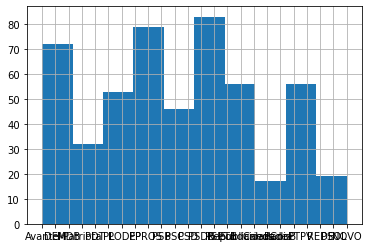

In [42]:
votos_df.partido.hist()
plt.show()

In [43]:
votos_df.to_csv('votos_presidente_camera', index=False)